| **Thông tin sinh viên** |                            |
|-------------------------|----------------------------|
| Họ và tên               | Lê Thị Minh Phương         |
| Mã số sinh viên         | 21120533                   |
| Lớp                     | Trực quan hóa dữ liệu - TH |

# **ILab01: Phân tích thành phần chính (PCA)**

Các thuộc tính định lượng của tập dữ liệu Iris:
- `sepal length (cm)`: Chiều dài lá đài (tính bằng cm)
- `sepal width (cm)'`: Chiều rộng lá đài (tính bằng cm)
- `petal length (cm)`: Chiều dài cánh hoa (tính bằng cm)
- `petal width (cm)`: Chiều rộng cánh hoa (tính bằng cm)

Nhãn của tập dữ liệu là thuộc tính phân loại `type` ứng với 3 loài hoa:
- Type Iris Setosa (type = 0)
- Iris Versicolor (type = 1)
- Iris Virginica (type = 2)

## Tập dữ liệu: Iris dataset

Bộ dữ liệu Iris là bộ dữ liệu cổ điển trong lĩnh vực học máy và thống kê. Nó được nhà thống kê và nhà sinh vật học người Anh Ronald Fisher giới thiệu trong bài báo năm 1936 "Việc sử dụng nhiều phép đo trong các vấn đề phân loại". Bộ dữ liệu bao gồm **150 mẫu** hoa diên vĩ (iris), mỗi mẫu có bốn đặc điểm (chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa và chiều rộng cánh hoa) được đo bằng centimet. Mỗi mẫu được dán nhãn bằng một trong ba loài hoa diên vĩ: Setosa, Versicolor và Virginica.


In [246]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

print("Số mẫu trong tập dữ liệu:", len(iris.data))
print("Các thuộc tính định lượng:", iris.feature_names)
print("Nhãn (biến type):", set(iris.target))

Số mẫu trong tập dữ liệu: 150
Các thuộc tính định lượng: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nhãn (biến type): {0, 1, 2}


Các thuộc tính định lượng của tập dữ liệu Iris:
- `sepal length (cm)`: Chiều dài lá đài (tính bằng cm)
- `sepal width (cm)'`: Chiều rộng lá đài (tính bằng cm)
- `petal length (cm)`: Chiều dài cánh hoa (tính bằng cm)
- `petal width (cm)`: Chiều rộng cánh hoa (tính bằng cm)

Nhãn của tập dữ liệu là thuộc tính phân loại `type` ứng với 3 loài hoa:
- Type Iris Setosa (type = 0)
- Iris Versicolor (type = 1)
- Iris Virginica (type = 2)

## Trực quan tập dữ liệu trên 2 chiều

Ta thử trực quan tập dữ liệu trên 2 chiều: `sepal length (cm)` và `sepal width (cm)`.

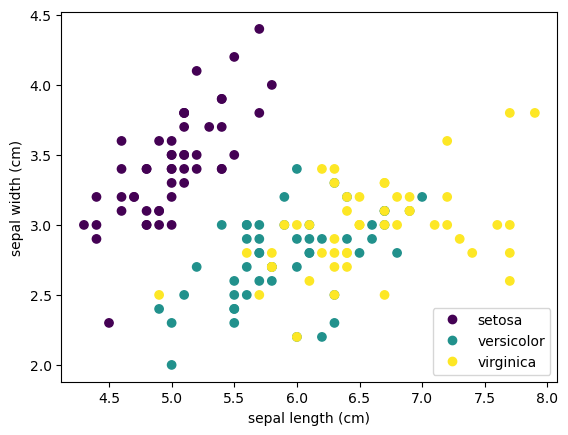

In [247]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right")

Ta thấy phép chiếu dữ liệu lên không gian con 2 chiều tạo bởi 2 thành phần đã chọn `sepal length (cm)` và `sepal width (cm)` không phải là một phép chiếu tốt, các điểm dữ liệu của các loài hoa phân biệt không quá nhiều qua 2 thuộc tính này. Ta sẽ áp dụng Phân tích thành phần chính (PCA) để tìm hai thành phần chính mới sao cho có thể phân biệt được các điểm dữ liệu tốt hơn.

## Tự cài đặt PCA

### **Bước 1: Chuẩn hóa dữ liệu**

In [248]:
X = iris.data
y = iris.target

Định nghĩa hàm chuẩn hóa:

In [249]:
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_scaled = (X - mean) / std_dev
    return X_scaled

Chuẩn hóa sử dụng hàm tự định nghĩa (cách 1) hoặc hàm của thư viện sklearn (cách 2):

In [250]:
# Cách 1: Sử dụng hàm tự định nghĩa
X_scaled = standard_scaler(X)

# cách 2: Sử dụng hàm của thư viện sklearn
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

### **Bước 2: Tính ma trận hiệp phương sai**

Công thức tính ma trận hiệp phương sai:
$$
    C_x = \langle \mathbf{xx}^T \rangle = \frac{1}{M} \sum_\mu x^\mu x^{\mu T}.
$$

Ta định nghĩa hàm tính ma trận hiệp phương sai:

In [251]:
def cov(X):
    n_samples = X.shape[0]
    covariance_matrix = (X.T @ X) / (n_samples - 1)
    return covariance_matrix

Tính ma trận hiệp phương sai sử dụng hàm tự định nghĩa (cách 1) hoặc hàm của thư viện numpy (cách 2):

In [252]:
# Cách 1: Sử dụng hàm tự định nghĩa 
covariance_matrix = cov(X_scaled)
print(covariance_matrix)

# Cách 2: Sử dụng hàm của thư viện numpy 
# covariance_matrix = np.cov(X_scaled.T)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### **Bước 3: Phân tích riêng (eigenvalue decomposition) ma trận hiệp phương sai**

Phân tích riêng ma trận hiệp phương sai:

$$
    C_x = \mathbf{U} \Lambda \mathbf{U}^T.
$$

Ta sử dụng hàm của thư viện numpy để tìm trị riêng và vector riêng của ma trận hiệp phương sai:

In [253]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

Để thống nhất về hướng của vector riêng dùng cho vector cơ sở của hệ tọa độ mới, ta nhân từng vector riêng (từng cột) với dấu của phần tử có giá trị tuyệt đối lớn nhất của nó để dấu của phần tử này luôn dương.

In [254]:
max_abs_idx = np.argmax(np.abs(eigenvectors), axis=0)
signs = np.sign(eigenvectors[max_abs_idx, range(eigenvectors.shape[0])])
eigenvectors = eigenvectors*signs[np.newaxis,:]

print("Trị riêng:\n", eigenvalues)
print("Vector riêng:\n", eigenvectors)

Trị riêng:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Vector riêng:
 [[ 0.52106591  0.37741762  0.71956635 -0.26128628]
 [-0.26934744  0.92329566 -0.24438178  0.12350962]
 [ 0.5804131   0.02449161 -0.14212637  0.80144925]
 [ 0.56485654  0.06694199 -0.63427274 -0.52359713]]


### **Bước 4: Sắp xếp các vector riêng theo thứ tự giảm dần trị riêng**

In [255]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

### **Bước 5: Chọn số lượng thành phần chính**

Các thành phần chính được chọn nên giải thích được ít nhất 80\% phương sai của dữ liệu. Để có thể chọn số lượng thành phần chính phù hợp, có thể sử dụng scree plot để xem lượng phương sai giải thích bởi mỗi thành phần chính; hoặc sử dụng biểu đồ thể hiện tỉ lệ phương sai tích lũy. 

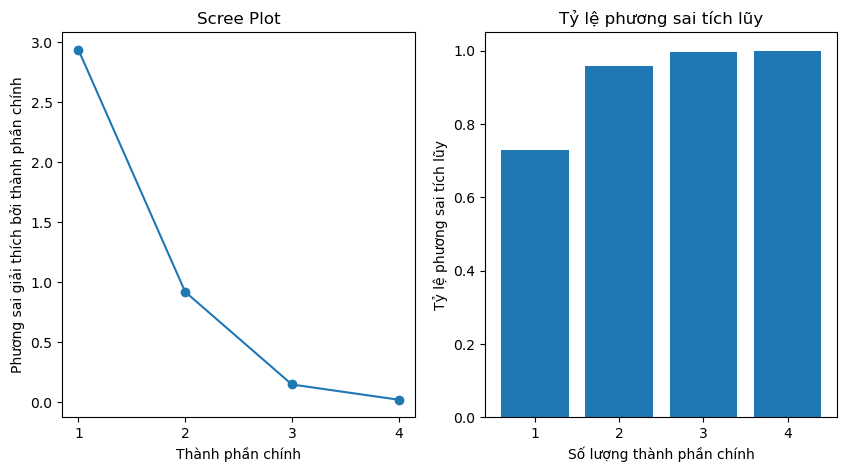

In [256]:
# Tính tỉ lệ phương sai giải thích bởi từng thành phần chính
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Tính tỉ lệ phương sai tích lũy
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Vẽ scree plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Thành phần chính')
plt.ylabel('Phương sai giải thích bởi thành phần chính')
plt.xticks(range(1, len(eigenvalues) + 1))


# Vẽ biểu đồ cột thể hiện tỉ lệ phương sai tích lũy
plt.subplot(1, 2, 2)
plt.bar(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, align='center')
plt.title('Tỷ lệ phương sai tích lũy')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tỷ lệ phương sai tích lũy')
plt.show()

Từ biểu đồ tỷ lệ phương sai tích lũy, ta thấy với 1 thành phần chính ta chỉ giải thích được dưới 80% dữ liệu. Với 2 thành phần chính, ta giải thích được trên 90% phương sai của dữ liệu. Vì vậy ta chọn số lượng thành phần chính là 2:

In [257]:
n_components = 2

Ta lấy ra 2 vector riêng (2 thành phần riêng) ứng với 2 trị riêng lớn nhất:

In [258]:
top_eigenvectors = sorted_eigenvectors[:, :n_components]

### **Bước 6: Chiếu dữ liệu**

Ánh xạ dữ liệu từ không gian nhiều chiều trong hệ tọa độ ban đầu vào không gian ít chiều trong hệ tọa độ mới với ma trận biến đổi
$$
    \mathbf{V} = \mathbf{U} \mathbf{V}'.
$$

In [259]:
X_pca = X_scaled.dot(top_eigenvectors)

Ta trực quan dữ liệu sau khi áp dụng PCA:

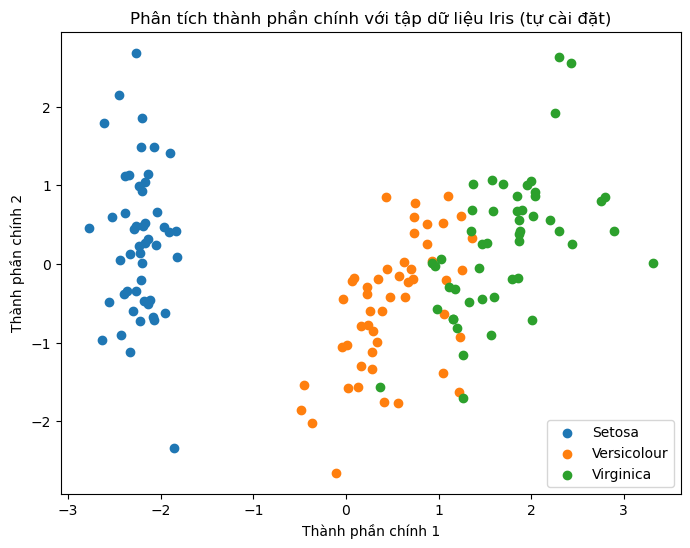

In [260]:
plt.figure(figsize=(8, 6))
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=name)
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Phân tích thành phần chính với tập dữ liệu Iris (tự cài đặt)')
plt.legend()
plt.show()

## Sử dụng hàm của sklearn

Sử dụng thư viện để thực hiện PCA

In [261]:
from sklearn.decomposition import PCA

# Tạo mô hình PCA
pca = PCA(n_components=2)

# Thực hiện PCA trên dữ liệu đã chuẩn hóa
X_pca_sklearn = pca.fit_transform(X_scaled)


Trực quan 

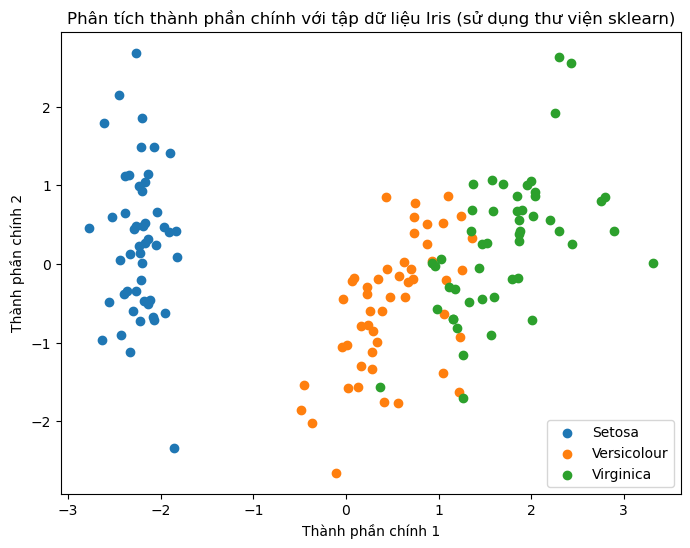

In [262]:
plt.figure(figsize=(8, 6))
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    plt.scatter(X_pca_sklearn[y == label, 0], X_pca_sklearn[y == label, 1], label=name)
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Phân tích thành phần chính với tập dữ liệu Iris (sử dụng thư viện sklearn)')
plt.legend()
plt.show()

### **Sử dụng kết quả PCA cho mục đích tính toán**

Vì PCA bảo toàn cấu trúc toàn cục của dữ liệu nên nó cũng được dùng cho mục đích giảm chi phí trong tính toán. Ta có thể áp dụng các kĩ thuật học máy khác sau khi áp dụng PCA, ví dụ ở đây là gom cụm KMeans.

Để so sánh, ta thực hiện gom cụm KMeans trên không gian 2 chiều trong 2 trường hợp:
- Giảm chiều bằng cách chọn thành phần tùy ý.
- Giảm chiều bằng kỹ thuật phân tích thành phần chính PCA.

In [263]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Áp dụng KMeans cho dữ liệu chưa phân tích PCA
kmeans_no_pca = KMeans(n_clusters=3)
kmeans_no_pca.fit(X)
cluster_labels_no_pca = kmeans_no_pca.labels_

# Áp dụng KMeans cho dữ liệu đã phân tích PCA
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_pca_sklearn)
cluster_labels_pca = kmeans_pca.labels_


Trực quan kết quả so sánh:

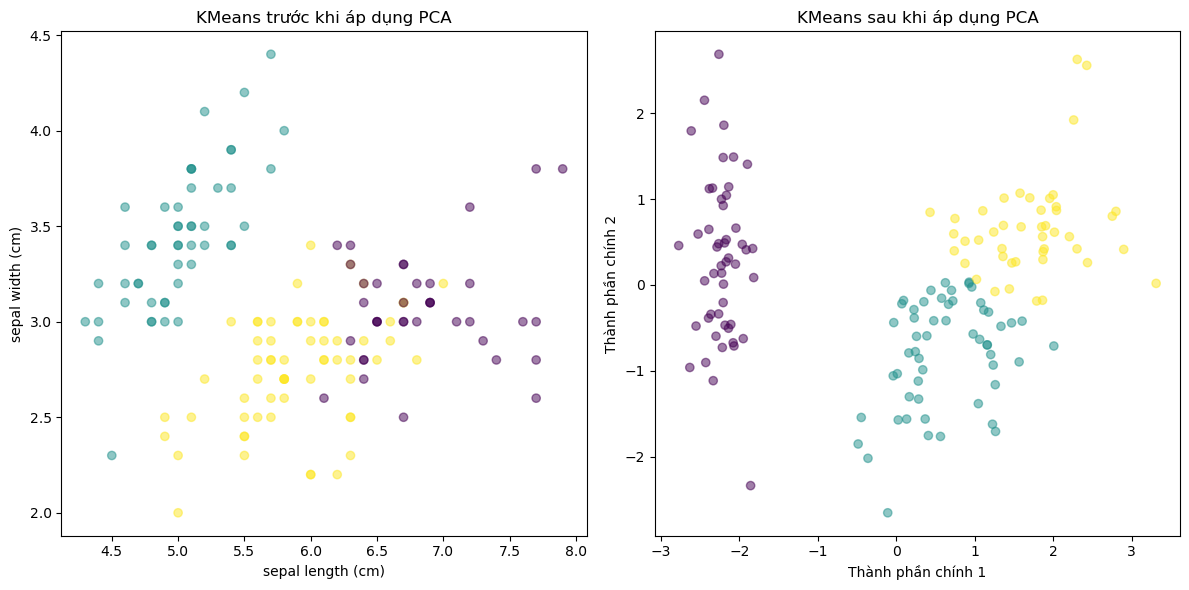

In [264]:
# Tạo subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Trực quan KMeans trước khi phân tích PCA
scatter_kmeans_no_pca = axs[0].scatter(X[:, 0], X[:, 1], c=cluster_labels_no_pca, cmap='viridis', alpha=0.5)
axs[0].set_title('KMeans trước khi áp dụng PCA')
axs[0].set_xlabel(iris.feature_names[0])
axs[0].set_ylabel(iris.feature_names[1])

# Trực quan KMeans sau khi phân tích PCA
scatter_kmeans_pca = axs[1].scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=cluster_labels_pca, cmap='viridis', alpha=0.5)
axs[1].set_title('KMeans sau khi áp dụng PCA')
axs[1].set_xlabel('Thành phần chính 1')
axs[1].set_ylabel('Thành phần chính 2')

# Show the plots
plt.tight_layout()
plt.show()
